In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
floders = os.listdir("charecter")
array = []
count = 0
for floder in floders:
    for i in range(0, 30):
        path = "charecter/" + floder + "/"+ str(i) +".png"
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        array.append(gray)
        count = count + 1


print("number of image: ", count)



number of image:  1440


In [4]:
#Label
label = []
countlabel = 0
for j in range(0, 48):
    for i in range(0, 30):
        label.append(i)
        countlabel = countlabel + 1

print("number of label: ", countlabel)

number of label:  1440


In [5]:
x = np.asarray(array)
y = np.asarray(label)

xTrain, xTest, yTrain, yTest = train_test_split(x, y , test_size = 0.2, random_state = 42)

print("X train: ", xTrain.shape)
print("y train: ", yTrain.shape)
print("X test: ", xTest.shape)
print("y test: ", yTest.shape)

xTain = xTrain.astype('float32') / 255.0
xTest = xTest.astype('float32') / 255.0

X train:  (1152, 32, 32)
y train:  (1152,)
X test:  (288, 32, 32)
y test:  (288,)


In [38]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 1)),
    layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),   
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(30, activation='softmax')
])
model.summary()
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dropout_8 (Dropout)         (None, 4608)             

In [39]:
# Train the model
#no batch_size
model.fit(xTrain, yTrain, epochs=20)

Epoch 1/20
36/36 [==============================] - 2s 31ms/step - loss: 13.8540 - accuracy: 0.2882
Epoch 2/20
36/36 [==============================] - 1s 30ms/step - loss: 0.5749 - accuracy: 0.8082
Epoch 3/20
36/36 [==============================] - 1s 30ms/step - loss: 0.2458 - accuracy: 0.9175
Epoch 4/20
36/36 [==============================] - 1s 31ms/step - loss: 0.1146 - accuracy: 0.9635
Epoch 5/20
36/36 [==============================] - 1s 31ms/step - loss: 0.1138 - accuracy: 0.9740
Epoch 6/20
36/36 [==============================] - 1s 29ms/step - loss: 0.1287 - accuracy: 0.9583
Epoch 7/20
36/36 [==============================] - 1s 29ms/step - loss: 0.0506 - accuracy: 0.9792
Epoch 8/20
36/36 [==============================] - 1s 28ms/step - loss: 0.0383 - accuracy: 0.9844
Epoch 9/20
36/36 [==============================] - 1s 26ms/step - loss: 0.0396 - accuracy: 0.9844
Epoch 10/20
36/36 [==============================] - 1s 26ms/step - loss: 0.0322 - accuracy: 0.9887
Epoch 11

In [40]:
model.evaluate(xTest, yTest)


9/9 [==============================] - 0s 13ms/step - loss: 3.2845 - accuracy: 0.9826


[3.284492254257202, 0.9826388955116272]

In [28]:
predict = model.predict(xTest)


9/9 [==============================] - 0s 14ms/step


20


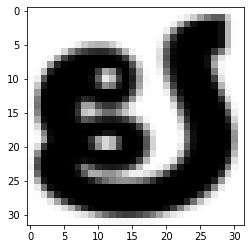

In [29]:
n = 190
print(np.argmax(predict[n]))
plt.imshow(xTest[n], cmap = 'gray')

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
#np.argmax(predict[0])
a = []

for i in predict:
    list(i)
    arg = np.argmax(i)
    a.append(arg)
print("accuracy: {}".format(accuracy_score(yTest, a)))

accuracy: 0.9236111111111112


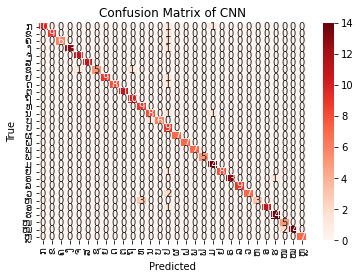

<Figure size 1440x1440 with 0 Axes>

In [32]:
import seaborn as sns

confu = confusion_matrix(yTest, a)
la = ["ກ", "ຂ", "ຄ", "ງ", "ຈ", "ສ", "ຊ", "ຍ", "ດ", "ຕ", "ຖ", "ທ", "ນ", "ບ", "ປ", "ຜ",
 "ຝ", "ພ", "ຟ", "ມ","ຢ", "ຣ", "ລ", "ວ", "ຫ", "ອ", "ຮ", "ໜ", "ໝ", "ຫຼ"]
conf_matrix = confu

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels= la, yticklabels = la)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of CNN")


plt.figure(figsize = (20, 20))

plt.show()


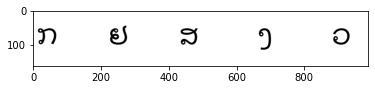

In [33]:
pimg  = cv2.imread("ex3.png")
pgray = cv2.cvtColor(pimg, cv2.COLOR_BGR2GRAY)
#gray = gray[:200][:200]
plt.imshow(pgray, cmap='gray')

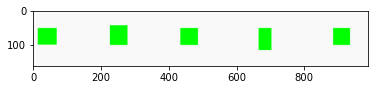

In [34]:
#ret, binary = cv2.threshold(gray, 180, 255, 0)
#plt.imshow(binary, cmap = 'gray')

pcanny = cv2.Canny(pimg, 50,200)
#ret, binary = cv2.threshold(gray, 180, 255, 0)
pconts, phierarchy = cv2.findContours(pcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
pimg2 = pimg.copy()

for pcont in pconts:
    px,py,pw,ph = cv2.boundingRect(pcont)
    cv2.rectangle(pimg2,(px,py),(px+pw,py+ph),(0,255,0),-1)


#imgray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(imgray, 80, 200, 0)
pcan = cv2.Canny(pimg2, 20, 200)
pcontours, p_hierarchy = cv2.findContours(pcan, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

pcrop = []
for pcnt in pcontours:
    px,py,pw,ph = cv2.boundingRect(pcnt)
    #cv2.rectangle(img,(x,y),(x+w+1,y+h+1),(0,255,0),1)
    ppic = list(pgray[py-1:py+ph+1,px-1:px+pw+1])
    pcrop.append(ppic)

plt.imshow(pimg2)

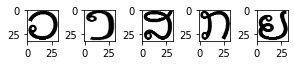

In [35]:
from skimage.transform import resize


crop32 = []
for i in pcrop:
    # Load the image array
    image = np.asarray(i)
    # Define the desired new shape
    new_shape = (32, 32)
    # Resize the image array
    new = resize(image, new_shape)
    crop32.append(list(new))


#plt.imshow(resized_image)
for i in range(int(len(crop32))):
    plt.subplot(6, 6, i+1)
    array = np.array(crop32[i])
    plt.imshow(array, cmap = 'gray')

plt.show()

In [36]:
data = np.asarray(crop32)
len(data)
pred = model.predict(data)
len(pred)

1/1 [==============================] - 0s 127ms/step


5

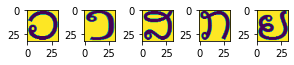

['ວ', 'ງ', 'ສ', 'ກ', 'ຢ']
[23, 3, 5, 0, 20]


In [37]:
la = ["ກ", "ຂ", "ຄ", "ງ", "ຈ", "ສ", "ຊ", "ຍ", "ດ", "ຕ", "ຖ", "ທ", "ນ", "ບ", "ປ", "ຜ",
 "ຝ", "ພ", "ຟ", "ມ","ຢ", "ຣ", "ລ", "ວ", "ຫ", "ອ", "ຮ", "ໜ", "ໝ", "ຫຼ"]
rlabel = []
re = []
for j in pred:
    a = np.argmax(j)
    re.append(a)
    rlabel.append(la[a])

for i in range(int(len(crop32))):
    plt.subplot(6, 6, i+1)
    array = np.array(crop32[i])
    plt.imshow(array)

plt.show()

print(rlabel)
print(re)

In [41]:
model.save("model/ac9826")

INFO:tensorflow:Assets written to: model/ac9826\assets


INFO:tensorflow:Assets written to: model/ac9826\assets


In [20]:
""" 
conf_matrix = confu

la = ["ກ", "ຂ", "ຄ", "ງ", "ຈ", "ສ", "ຊ", "ຍ", "ດ", "ຕ", "ຖ", "ທ", "ນ", "ບ", "ປ", "ຜ",
 "ຝ", "ພ", "ຟ", "ມ","ຢ", "ຣ", "ລ", "ວ", "ຫ", "ອ", "ຮ", "ໜ", "ໝ", "ຫຼ", "ໆ", "ຯ"]

m = plt.matshow(conf_matrix, cmap=plt.cm.Reds)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
#plt.xticks(x, la)
#plt.xticks(y, la)


# Add the value in each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

plt.figure(figsize=(30, 30))
plt.show() """


' \nconf_matrix = confu\n\nla = ["ກ", "ຂ", "ຄ", "ງ", "ຈ", "ສ", "ຊ", "ຍ", "ດ", "ຕ", "ຖ", "ທ", "ນ", "ບ", "ປ", "ຜ",\n "ຝ", "ພ", "ຟ", "ມ","ຢ", "ຣ", "ລ", "ວ", "ຫ", "ອ", "ຮ", "ໜ", "ໝ", "ຫຼ", "ໆ", "ຯ"]\n\nm = plt.matshow(conf_matrix, cmap=plt.cm.Reds)\nplt.colorbar()\nplt.xlabel("Predicted label")\nplt.ylabel("True label")\n#plt.xticks(x, la)\n#plt.xticks(y, la)\n\n\n# Add the value in each cell\nfor i in range(conf_matrix.shape[0]):\n    for j in range(conf_matrix.shape[1]):\n        plt.text(x=j, y=i, s=conf_matrix[i, j], va=\'center\', ha=\'center\')\n\nplt.figure(figsize=(30, 30))\nplt.show() '